In [65]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'xgboost'

In [64]:
x_train = pd.read_csv('test/Train_60/X_Train_Data_Input.csv').drop(['Column5','Column9','Column14'],axis=1)
y_train = pd.read_csv('test/Train_60/Y_Train_Data_Target.csv')
x_test = pd.read_csv('test/Test_20/X_Test_Data_Input.csv').drop(['Column5','Column9','Column14'],axis=1)
y_test = pd.read_csv('test/Test_20/Y_Test_Data_Target.csv')

train_df = pd.merge(x_train, y_train, on='ID').drop('ID',axis=1)
# test_df = pd.merge(x_test, y_test, on='ID').drop('ID',axis=1)

# x_train = train_df.iloc[:, :-1].drop('ID',axis=1)
# y_train = train_df.iloc[:, -1]

# x_test = test_df.iloc[:, :-1].drop('ID',axis=1)
# y_test = test_df.iloc[:, -1]

In [53]:
x_train.drop('ID',axis=1, inplace=True)
y_train.drop('ID',axis=1,inplace=True)

x_test.drop('ID',axis=1, inplace=True)
y_test.drop('ID',axis=1,inplace=True)

In [32]:
print(x_train.isnull().sum())

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column6       3850
Column7          0
Column8       3850
Column10         0
Column11         0
Column12         0
Column13         0
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64


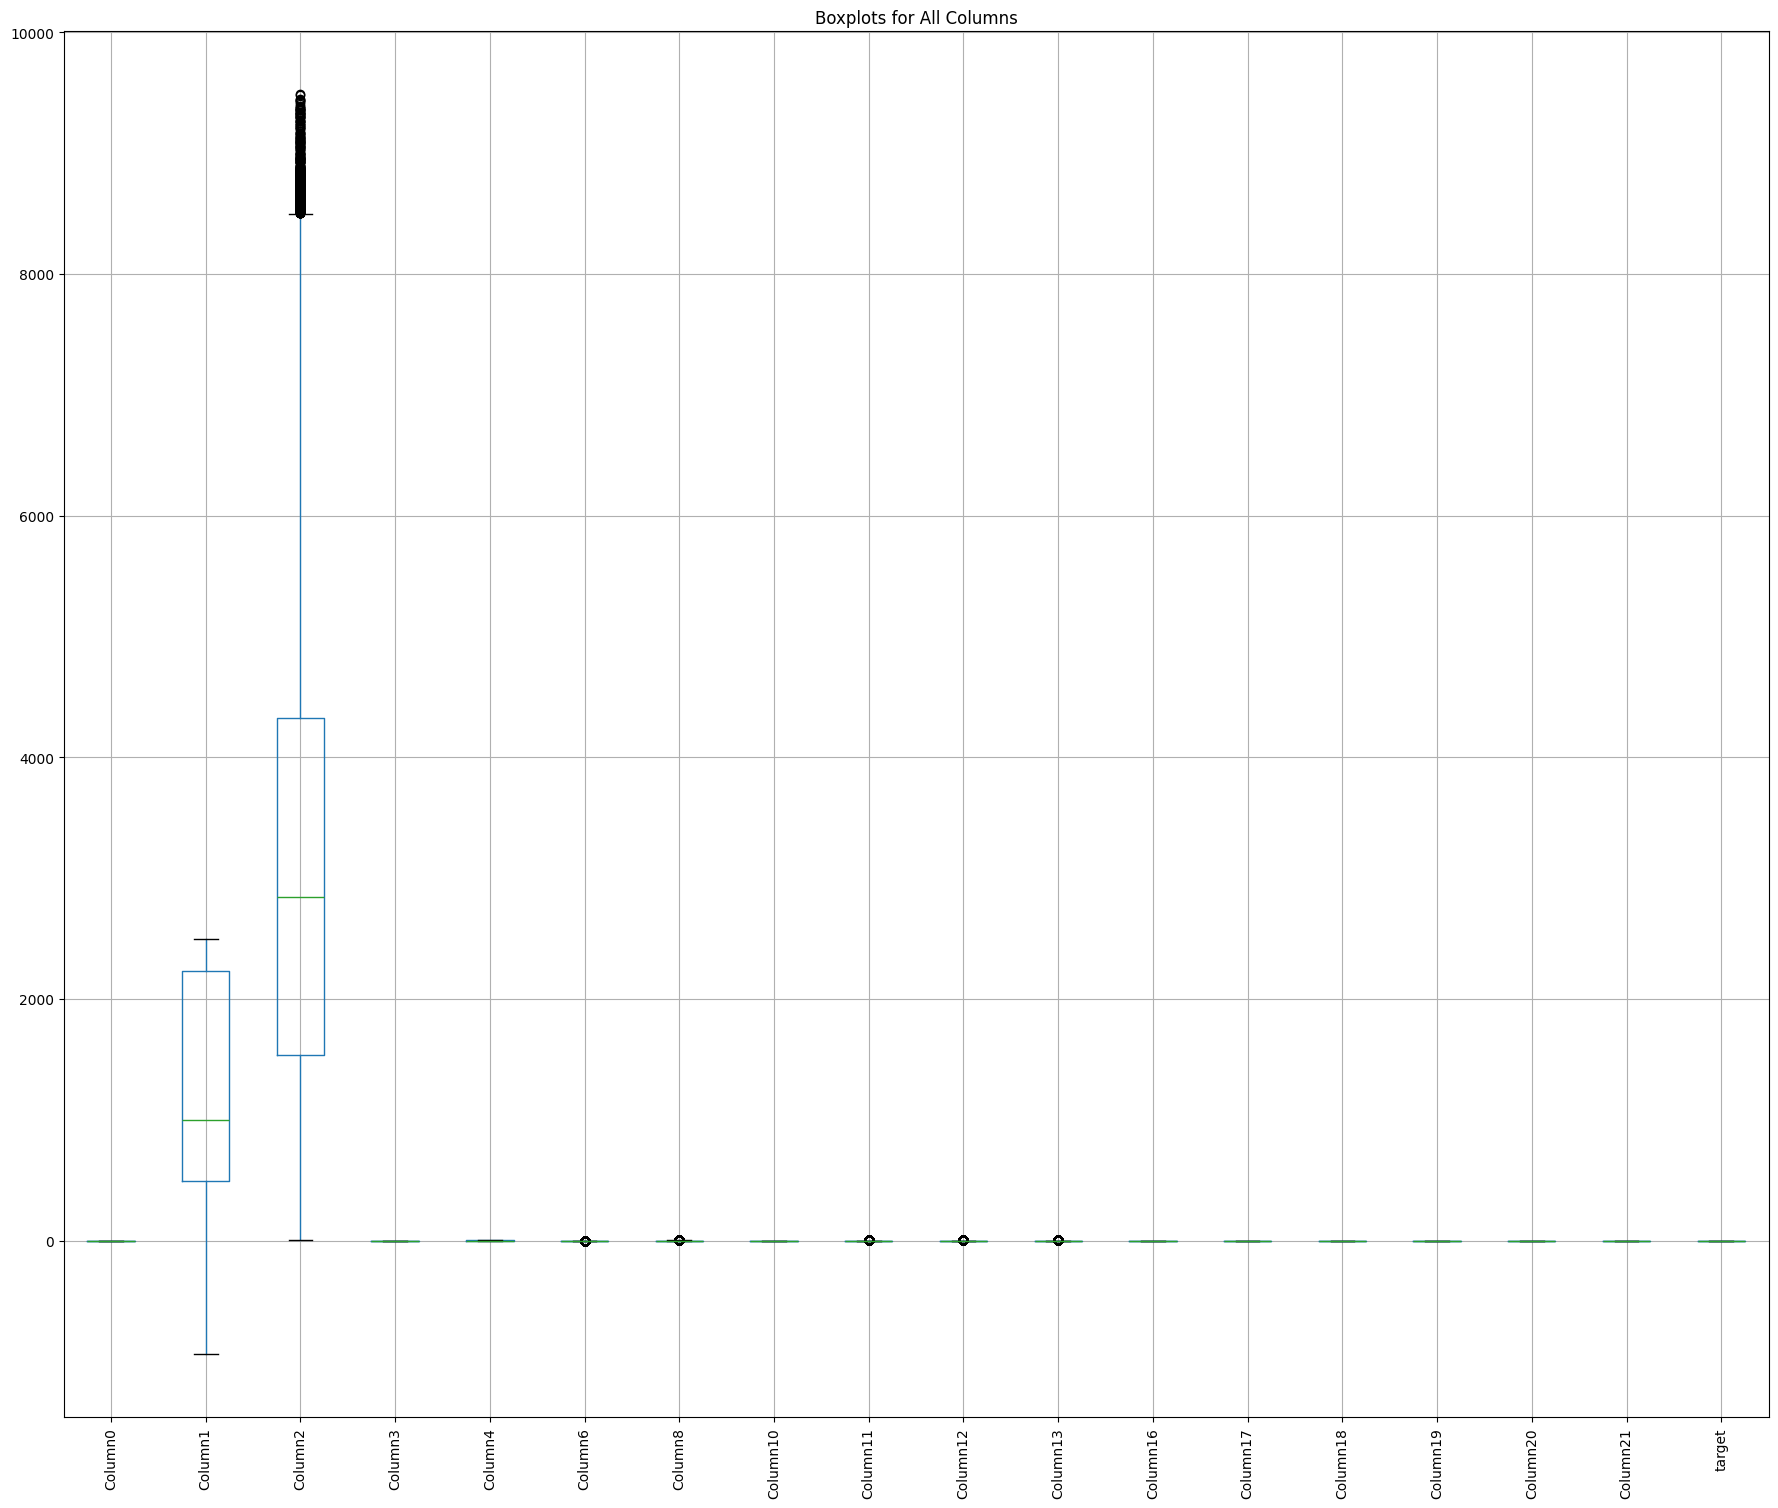

In [21]:
plt.figure(figsize=(22, 18))
df_clean_iqr.boxplot()
plt.title('Boxplots for All Columns')
plt.xticks(rotation=90)
plt.show()

In [21]:
def remove_outliers_zscore(df, threshold=3):
    """
    Remove outliers using the Z-score method.

    Parameters:
    df (pandas.DataFrame): The input DataFrame
    threshold (float): The Z-score threshold (default is 3)
    """
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    df_clean = df[(z_scores < threshold).all(axis=1)]
    return df_clean

def remove_outliers_iqr(df, factor=1.5):
    """
    Remove outliers using the Interquartile Range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The input DataFrame
    factor (float): The IQR factor (default is 1.5)
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df < (Q1 - factor * IQR)) | (df > (Q3 + factor * IQR))).any(axis=1)]
    return df_clean

In [54]:
# Impute missing values with the median for all columns
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(x_train)

In [ ]:
# Convert back to DataFrame for easier handling
X_imputed_df = pd.DataFrame(X_imputed, columns=x_train.columns)

NameError: name 'pd' is not defined

In [56]:
# Step 2: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed_df, y_train)

In [10]:
X_resampled.shape

(1422200, 17)

In [57]:
X_resampled['target'] = y_resampled['target']

In [19]:
X_resampled.head()

,Column0,Column1,Column2,Column3,Column4,Column6,Column8,Column10,Column11,Column12,Column13,Column16,Column17,Column18,Column19,Column20,Column21,target
0,2.0,2495.0,3726.0,0.678139,0.701403,0.434190,0.606265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,2495.0,3454.0,0.452580,0.701403,1.554998,0.329946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,2495.0,4543.0,-1.577453,-1.429540,-0.407939,-0.774979,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,211.0,59.0,0.678139,0.701403,-0.407939,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,718.0,950.0,-2.028572,-1.855728,-0.407939,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [58]:
# Example usage:
# Assuming 'df' is your DataFrame
# df_clean_zscore = remove_outliers_zscore(train_df)
df_clean_iqr = remove_outliers_iqr(X_resampled)

# To apply to specific columns:
# df_clean_zscore = df.copy()
# df_clean_zscore[['column1', 'column2']] = remove_outliers_zscore(df[['column1', 'column2']])

# df_clean_iqr = df.copy()
# df_clean_iqr[['column1', 'column2']] = remove_outliers_iqr(df[['column1', 'column2']])

x_train = df_clean_iqr.iloc[:, :-1]
y_train = df_clean_iqr.iloc[:, -1]

In [ ]:
# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
# Step 4: Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [ ]:
# Step 5: Initialize and train Random Forest with cross-validation
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X_poly, y_resampled, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

KeyboardInterrupt: 

In [48]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or 'median', 'most_frequent', 'constant'
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [49]:
# Train the pipeline on the training data
pipeline.fit(x_train, y_train)

e:\Desktop2\lab\Ai\Predictive-Model-GST\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False
)
model.fit(x_train, y_train)

e:\Desktop2\lab\Ai\Predictive-Model-GST\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

e:\Desktop2\lab\Ai\Predictive-Model-GST\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [3]:
model = HistGradientBoostingClassifier(class_weight='balanced')
model.fit(x_train, y_train)

e:\Desktop2\lab\Ai\Predictive-Model-GST\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(class_weight='balanced')

In [60]:
x_train.columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column6',
       'Column7', 'Column8', 'Column10', 'Column11', 'Column12', 'Column13',
       'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20',
       'Column21'],
      dtype='object')

In [61]:
x_test.columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column6',
       'Column7', 'Column8', 'Column10', 'Column11', 'Column12', 'Column13',
       'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20',
       'Column21'],
      dtype='object')

In [62]:
# Make predictions
y_pred = model.predict(x_test)

In [63]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print(f"\nAUC-ROC: {auc_roc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.97

Confusion Matrix:
[[231145   5889]
 [  1863  22815]]

AUC-ROC: 0.9498

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.79      0.92      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.95      0.92    261712
weighted avg       0.97      0.97      0.97    261712



In [ ]:
model.predict([[1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([1])

Accuracy: 0.98

Confusion Matrix:
[[232707   4327]
 [  1403  23275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712